<img src=images/MIT_logo.jpg width=150 align=right />

# PROFESSIONAL CERTIFICATE IN DATA SCIENCE AND ANALYTICS
# Linear Regression: Part One
This code snippet imports several essential Python libraries and modules commonly used for data analysis, statistical modeling, and visualization. Each library serves a specific purpose in the context of linear regression and related tasks.

1. **`numpy` (`import numpy as np`)**:
   - NumPy is a fundamental library for numerical computing in Python. It provides support for multi-dimensional arrays and a wide range of mathematical operations. The alias `np` is a standard convention for referencing NumPy functions. In the context of linear regression, NumPy is often used for handling numerical data, performing matrix operations, and generating random data.

2. **`pandas` (`import pandas as pd`)**:
   - Pandas is a library designed for data manipulation and analysis. It introduces data structures like `DataFrame` and `Series`, which make it easy to handle structured data. The alias `pd` is a standard convention for referencing Pandas functions. In this context, Pandas is likely used to organize and preprocess datasets for regression analysis.

3. **`scipy.stats` (`from scipy import stats`)**:
   - The `stats` module from SciPy provides a wide range of statistical functions and distributions. It is often used for hypothesis testing, calculating statistical measures, and working with probability distributions. In regression analysis, `stats` can be used to evaluate model assumptions or compute statistical metrics.

4. **`matplotlib.pyplot` (`from matplotlib import pyplot as plt`)**:
   - Matplotlib is a popular library for creating visualizations. The `pyplot` module provides a MATLAB-like interface for generating plots. The alias `plt` is a standard convention for referencing `pyplot`. In the context of linear regression, Matplotlib is typically used to create scatter plots, visualize regression lines, and display residuals.

5. **`statsmodels.formula.api` (`import statsmodels.formula.api as smf`)**:
   - Statsmodels is a library for statistical modeling and hypothesis testing. The `formula.api` module provides a high-level interface for specifying models using formulas (e.g., `y ~ x1 + x2`). This is particularly useful for performing linear regression and obtaining detailed model summaries, including coefficients, p-values, and R² values.

6. **`sklearn.linear_model.LinearRegression` (`from sklearn.linear_model import LinearRegression`)**:
   - Scikit-learn is a machine learning library that provides tools for building and evaluating models. The `LinearRegression` class is used to perform linear regression using an efficient implementation. It supports fitting models, making predictions, and accessing model parameters like coefficients and intercepts.

### Purpose:
These imports collectively provide the tools needed to perform linear regression, preprocess data, visualize results, and evaluate model performance. By combining these libraries, the code can handle tasks ranging from data preparation to advanced statistical analysis and machine learning.

In [1]:
import numpy                                           as np  # type: ignore
import pandas                                          as pd  # type: ignore
from   scipy                   import stats                   # type: ignore
from   matplotlib              import pyplot           as plt # type: ignore
import statsmodels.formula.api                         as smf # type: ignore
from   sklearn.linear_model    import LinearRegression        # type: ignore
import pprint                                           

This function, `abline`, is designed to plot a straight line on an existing Matplotlib plot using a given slope and intercept. It is particularly useful for visualizing linear relationships, such as regression lines, over a scatter plot or other data visualizations.

### Step-by-Step Explanation:

1. **Retrieve the Current Axes**:
   - `axes = plt.gca()`:
     - This retrieves the current axes object from the active Matplotlib figure using the `gca()` (get current axes) function. The axes object represents the plotting area and provides access to its properties, such as the x-axis limits.

2. **Get the X-Axis Limits**:
   - `x_vals = np.array(axes.get_xlim())`:
     - The `get_xlim()` method of the axes object returns the current x-axis limits as a tuple `(left, right)`. These limits define the range of x-values over which the line will be plotted.
     - The `np.array()` function converts this tuple into a NumPy array, which allows for efficient mathematical operations.

3. **Calculate the Corresponding Y-Values**:
   - `y_vals = intercept + slope * x_vals`:
     - Using the equation of a straight line, `y = intercept + slope * x`, the function calculates the corresponding y-values for the x-axis limits. This ensures that the line spans the entire width of the plot.

4. **Reshape the X and Y Values**:
   - `x_vals, y_vals = x_vals.reshape(-1, 1), y_vals.reshape(-1, 1)`:
     - The `reshape(-1, 1)` method reshapes the x and y arrays into column vectors. While this step is not strictly necessary for plotting, it may be included to ensure compatibility with other operations or conventions in the code.

5. **Plot the Line**:
   - `plt.plot(x_vals, y_vals, '--', color=color)`:
     - The `plot()` function is used to draw the line on the current plot. The arguments specify:
       - `x_vals` and `y_vals`: The x and y coordinates of the line.
       - `'--'`: A dashed line style.
       - `color=color`: The color of the line, which is passed as an argument to the function.

### Purpose:
The `abline` function is a utility for adding a straight line to a plot, typically to represent a linear model or trend. By using the current x-axis limits, it ensures that the line fits seamlessly within the existing plot. The ability to customize the line's color makes it versatile for highlighting different relationships or comparisons in a visualization.

In [2]:
def abline(intercept, slope, color):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    x_vals, y_vals = x_vals.reshape(-1, 1),y_vals.reshape(-1, 1)
    plt.plot(x_vals, y_vals, '--', color=color)

## Simple linear regression
$$y = b + wx$$

We want to find an optimal set of values for $w$ and $b$ that minimize the residuals.
This code snippet demonstrates the process of performing simple linear regression using synthetic data, visualizing the results with a scatter plot and a regression line.

### Step-by-Step Explanation:

1. **Generate Synthetic Data**:
   - `x = np.random.uniform(0, 10, 20)`:
     - This generates 20 random values for `x` uniformly distributed between 0 and 10.
   - `y = 10 + x * 2 + np.random.randn(20) * 2`:
     - The corresponding `y` values are generated using the linear equation `y = 10 + 2x` with added random noise. The noise is drawn from a standard normal distribution (`np.random.randn`) and scaled by a factor of 2 to introduce variability.

2. **Reshape Data**:
   - `x, y = x.reshape(-1, 1), y.reshape(-1, 1)`:
     - The `reshape` method converts the 1D arrays `x` and `y` into 2D column vectors with one column and multiple rows. This is required because the `LinearRegression` model expects 2D input for features (`x`) and target values (`y`).

3. **Fit the Linear Regression Model**:
   - `lr = LinearRegression()`:
     - An instance of the `LinearRegression` class from Scikit-learn is created.
   - `lr.fit(x, y)`:
     - The model is trained (fitted) on the data. It calculates the optimal slope (`coef_`) and intercept (`intercept_`) that minimize the residual sum of squares between the observed `y` values and the predicted values.

4. **Print Model Parameters**:
   - `print(lr.intercept_, lr.coef_)`:
     - The intercept and slope of the fitted regression line are printed. These parameters define the equation of the line: `y = intercept + slope * x`.

5. **Visualize the Data and Regression Line**:
   - `plt.scatter(x, y)`:
     - A scatter plot of the data points is created, showing the relationship between `x` and `y`.
   - `abline(lr.intercept_, lr.coef_, 'tab:orange')`:
     - The `abline` function is called to plot the regression line using the calculated intercept and slope. The line is displayed in orange with a dashed style.
   - `plt.ylim((0, 40))`:
     - The y-axis limits are set to range from 0 to 40 to ensure the plot is appropriately scaled.
   - `plt.show()`:
     - The plot is displayed.

### Purpose:
This code illustrates how to perform simple linear regression on a dataset and visualize the results. The scatter plot shows the data points, while the regression line represents the best-fit line that models the relationship between `x` and `y`. The added noise in `y` simulates real-world data variability, making this a practical example of regression analysis.

[10.1629596] [[2.0530771]]


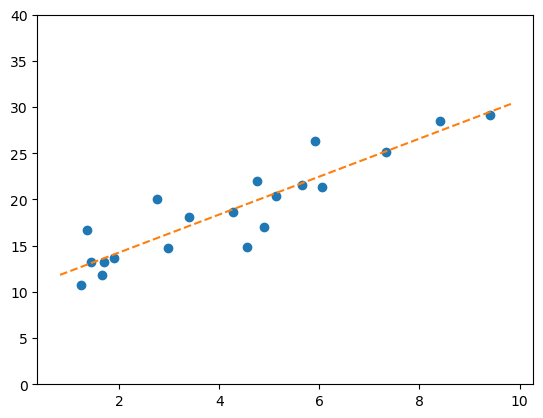

In [3]:
x    = np.random.uniform(0, 10, 20)
y    = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)
lr   = LinearRegression()
lr.fit(x, y)
print(lr.intercept_, lr.coef_)
plt.scatter(x, y)
abline(lr.intercept_, lr.coef_, 'tab:orange')
#abline(25, -1, 'tab:green')
plt.ylim((0, 40))
plt.show()

## Multiple linear regression
Each data point now has many values (dimensions), not just X.

We still want to predict a single Y by finding an optimal vector of coefficients.

$$
y = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n
$$

$$
y = w_01 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
$$
This code snippet demonstrates the process of performing multiple linear regression using synthetic data. It generates a dataset with three independent variables (features) and one dependent variable (target), fits a linear regression model to the data, and outputs the model's parameters.

### Step-by-Step Explanation:

1. **Generate Synthetic Data**:
   - `n = 100`:
     - Specifies the number of data points (samples) to generate.
   - `X = np.random.uniform(0, 1, 3 * n).reshape((n, -1))`:
     - Creates a 2D array `X` with `n` rows and 3 columns, where each element is a random value uniformly distributed between 0 and 1. This represents the feature matrix with three independent variables.
   - `y = 10 + X[:, 0] * 2 + X[:, 1] * 5 + X[:, 2] * (-3) + np.random.randn(n) * 1`:
     - Generates the target variable `y` using a linear equation:
       - The intercept is `10`.
       - The coefficients for the three features are `2`, `5`, and `-3`, respectively.
       - Random noise is added to `y` using `np.random.randn(n) * 1`, which introduces variability to simulate real-world data.

2. **Fit the Linear Regression Model**:
   - `lr = LinearRegression()`:
     - Creates an instance of the `LinearRegression` class from Scikit-learn. This class implements ordinary least squares regression.
   - `lr.fit(X, y)`:
     - Fits the linear regression model to the data. The `fit` method calculates the optimal coefficients (`coef_`) and intercept (`intercept_`) that minimize the residual sum of squares between the observed `y` values and the predicted values.

3. **Output the Model Parameters**:
   - `print(lr.intercept_, lr.coef_)`:
     - Prints the intercept and coefficients of the fitted model. These parameters define the equation of the regression line:
       ```
       y = intercept + coef_[0] * X[:, 0] + coef_[1] * X[:, 1] + coef_[2] * X[:, 2]
       ```
     - The intercept and coefficients should closely match the values used to generate `y` (i.e., `10`, `2`, `5`, and `-3`), with slight deviations due to the added noise.

### Purpose:
This code illustrates how to perform multiple linear regression on a dataset with multiple features. By generating synthetic data with known parameters, it provides a controlled environment to verify the accuracy of the regression model. The fitted model can then be used to make predictions or analyze the relationships between the features and the target variable.

In [8]:
n  = 100
X  = np.random.uniform(0, 1, 3 * n).reshape((n, -1))
y  = 10 + X[:, 0] * 2 + X[:, 1] * 5 + X[:, 2] * (-3) + np.random.randn(n) * 1
lr = LinearRegression()
lr.fit(X, y)
print('Intercept   : ', lr.intercept_)
print('Coefficients: ', lr.coef_)

Intercept   :  9.479223262258262
Coefficients:  [ 2.37551194  5.3573248  -2.58798737]


This code snippet creates a Pandas DataFrame to organize the synthetic data generated earlier for multiple linear regression. It structures the independent variables (`x1`, `x2`, `x3`) and the dependent variable (`y`) into a tabular format, making it easier to analyze and manipulate the data.

### Step-by-Step Explanation:

1. **Create a DataFrame for Independent Variables**:
   - `pd.DataFrame(X, columns=['x1', 'x2', 'x3'])`:
     - The `X` array, which contains the three independent variables, is converted into a Pandas DataFrame.
     - The `columns` parameter assigns meaningful names (`x1`, `x2`, `x3`) to the columns, corresponding to the three features in the dataset. This makes the data more interpretable and easier to work with.

2. **Add the Dependent Variable**:
   - `df['y'] = pd.Series(y)`:
     - The target variable `y` is added as a new column in the DataFrame. The `pd.Series(y)` ensures that `y` is properly formatted as a Pandas Series before being added to the DataFrame.
     - This step associates the dependent variable (`y`) with its corresponding independent variables (`x1`, `x2`, `x3`) in the same row.

3. **Display the DataFrame**:
   - `df`:
     - Simply referencing the DataFrame in a Jupyter Notebook cell outputs its contents, allowing you to inspect the data. This is useful for verifying that the data has been correctly structured.

### Purpose:
This code organizes the synthetic dataset into a structured format that is ideal for further analysis, such as fitting regression models or performing exploratory data analysis. By using a DataFrame, you can easily access, manipulate, and visualize the data, which is essential for tasks like statistical modeling or machine learning.

In [ ]:
df      = pd.DataFrame(X, columns=['x1', 'x2', 'x3'])
df['y'] = pd.Series(y)
df

This code snippet demonstrates how to perform multiple linear regression using the `statsmodels` library and obtain a detailed summary of the model's results.

### Step-by-Step Explanation:

1. **Define the Regression Model**:
   - `smf.ols('y ~ x1 + x2 + x3', data=df)`:
     - The `ols` function from `statsmodels.formula.api` is used to define an Ordinary Least Squares (OLS) regression model.
     - The formula `'y ~ x1 + x2 + x3'` specifies the relationship between the dependent variable (`y`) and the independent variables (`x1`, `x2`, and `x3`). The tilde (`~`) separates the dependent variable from the independent variables, and the `+` operator indicates that all three independent variables are included in the model.
     - The `data=df` argument specifies that the variables `y`, `x1`, `x2`, and `x3` are columns in the Pandas DataFrame `df`.

2. **Fit the Model**:
   - `.fit()`:
     - This method fits the OLS regression model to the data by estimating the coefficients (intercept and slopes) that minimize the residual sum of squares. Internally, it uses numerical techniques such as the Moore-Penrose pseudoinverse or QR decomposition to solve the least squares problem.

3. **Generate the Model Summary**:
   - `model.summary()`:
     - This method generates a comprehensive summary of the fitted regression model. The summary includes:
       - **Coefficients**: The estimated values for the intercept and slopes of the independent variables.
       - **P-values**: Statistical significance of each coefficient, indicating whether the variable has a meaningful relationship with the dependent variable.
       - **R-squared and Adjusted R-squared**: Measures of how well the independent variables explain the variability in the dependent variable.
       - **F-statistic**: A test statistic for the overall significance of the model.
       - **Standard Errors**: The variability of the coefficient estimates.
       - **Residual Statistics**: Information about the distribution of the residuals (errors).

### Purpose:
This code is used to build and evaluate a multiple linear regression model. The `model.summary()` output provides insights into the relationships between the dependent and independent variables, the model's overall performance, and the statistical significance of each predictor. This information is crucial for interpreting the model and making data-driven decisions.

In [ ]:
model = smf.ols('y ~ x1 + x2 + x3', data=df).fit()
model.summary()

## R<sup>2</sup>: coefficient of determination

$R^2 = 1 - \frac{\textrm{unexplained variability}}{\textrm{total variability}} = 1 - \frac{SSR}{SST}$

$R^2_{adj} = 1 - \frac{SSR}{SST} \cdot \frac{n - 1}{n - k - 1} $

This code snippet calculates and prints both the **R² (coefficient of determination)** and the **adjusted R²** for a regression model. These metrics are essential for evaluating the performance of a regression model, particularly in explaining the variability of the dependent variable.

### Step-by-Step Explanation:

1. **Retrieve R² Value**:
   - `R2 = model.rsquared`:
     - The `rsquared` attribute of the `model` object (from `statsmodels`) retrieves the R² value of the fitted regression model. R² measures the proportion of the variance in the dependent variable (`y`) that is explained by the independent variables (`x1`, `x2`, `x3`). It ranges from 0 to 1, where higher values indicate better model performance.

2. **Define Adjusted R² Calculation**:
   - `def R2_adjust(r2, n, k):`:
     - This function calculates the **adjusted R²**, which adjusts the R² value to account for the number of predictors (`k`) and the sample size (`n`). Adjusted R² penalizes the inclusion of irrelevant predictors, making it a more reliable metric for comparing models with different numbers of predictors.
   - The formula used is:
     ```
     Adjusted R² = 1 - ((1 - R²) * (n - 1) / (n - k - 1))
     ```
     - `n`: Total number of observations (sample size).
     - `k`: Number of predictors (independent variables).
     - The adjustment ensures that adding more predictors to the model does not artificially inflate the R² value.

3. **Calculate Adjusted R²**:
   - `adjR2 = R2_adjust(R2, 100, 3)`:
     - The `R2_adjust` function is called with:
       - `R2`: The R² value of the model.
       - `n = 100`: The total number of observations in the dataset.
       - `k = 3`: The number of independent variables in the model (`x1`, `x2`, `x3`).
     - The function returns the adjusted R² value, which accounts for the model's complexity.

4. **Print R² and Adjusted R²**:
   - `print('R2         : ', R2)`:
     - Outputs the R² value, showing how much of the variability in the dependent variable is explained by the model.
   - `print('Adjusted R2: ', adjR2)`:
     - Outputs the adjusted R² value, which provides a more nuanced evaluation by penalizing unnecessary predictors.

### Purpose:
The R² value indicates how well the model explains the variability in the dependent variable, while the adjusted R² provides a more accurate assessment by considering the number of predictors and the sample size. Together, these metrics help in assessing the quality and efficiency of the regression model, particularly when comparing models with different numbers of predictors.

In [ ]:
R2 = model.rsquared
def R2_adjust(r2, n, k):
    """Calculate adjusted R2"""
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
adjR2 = R2_adjust(R2, 100, 3)
print('R2         : ',R2)
print('Adjusted R2: ',adjR2)

This code snippet prints the **adjusted R² (R² adjusted)** value of a regression model. The adjusted R² is a statistical metric that evaluates the goodness of fit of a regression model while accounting for the number of predictors used.

### Explanation:

1. **Accessing Adjusted R²**:
   - `model.rsquared_adj`:
     - This attribute of the `model` object (from `statsmodels`) retrieves the adjusted R² value of the fitted regression model. Unlike the standard R², which measures the proportion of variance in the dependent variable explained by the independent variables, the adjusted R² adjusts for the number of predictors in the model. It penalizes the inclusion of irrelevant predictors that do not improve the model's explanatory power.

2. **Printing the Adjusted R²**:
   - `print('RS Square Adj: ', model.rsquared_adj)`:
     - The `print` function outputs a descriptive label (`'RS Square Adj: '`) followed by the value of `model.rsquared_adj`. This makes it easy to interpret the adjusted R² value in the context of the regression analysis.

### Purpose:
The adjusted R² is particularly useful when comparing regression models with different numbers of predictors. It provides a more reliable measure of model performance by accounting for model complexity. A higher adjusted R² indicates a better balance between explanatory power and simplicity, making it a key metric for evaluating and selecting regression models.

In [ ]:
print('RS Square Adj: ', model.rsquared_adj)

## Mean Squared Error

$MSE = \frac{SSR}{n}$

$RMSE = \sqrt{MSE}$

This code snippet demonstrates how to evaluate the performance of a simple linear regression model by calculating two common error metrics: **Root Mean Squared Error (RMSE)** and **Mean Absolute Error (MAE)**. These metrics quantify the difference between the predicted and actual values, providing insight into the model's accuracy.

### Step-by-Step Explanation:

1. **Generate Synthetic Data**:
   - `x = np.random.uniform(0, 10, 20)`:
     - Generates 20 random values for `x` uniformly distributed between 0 and 10.
   - `y = 10 + x * 2 + np.random.randn(20) * 2`:
     - Creates the corresponding `y` values using the linear equation `y = 10 + 2x` with added random noise. The noise is drawn from a standard normal distribution (`np.random.randn`) and scaled by a factor of 2 to simulate variability in real-world data.

2. **Reshape Data**:
   - `x, y = x.reshape(-1, 1), y.reshape(-1, 1)`:
     - Reshapes the 1D arrays `x` and `y` into 2D column vectors. This is necessary because the `LinearRegression` model expects 2D input for both features (`x`) and target values (`y`).

3. **Fit the Linear Regression Model**:
   - `lr = LinearRegression()`:
     - Creates an instance of the `LinearRegression` class from Scikit-learn.
   - `lr.fit(x, y)`:
     - Fits the linear regression model to the data. The model learns the optimal slope (`coef_`) and intercept (`intercept_`) that minimize the residual sum of squares between the observed `y` values and the predicted values.

4. **Calculate RMSE**:
   - `rmse = np.sqrt(np.mean((lr.predict(x) - y)**2))`:
     - Computes the **Root Mean Squared Error (RMSE)**:
       - `lr.predict(x)` generates predictions for the input `x`.
       - `(lr.predict(x) - y)` calculates the residuals (differences between predicted and actual values).
       - Squaring the residuals, taking their mean, and then applying the square root yields the RMSE.
     - RMSE penalizes larger errors more heavily, making it sensitive to outliers.

5. **Calculate MAE**:
   - `mae = np.mean(abs(lr.predict(x) - y))`:
     - Computes the **Mean Absolute Error (MAE)**:
       - `abs(lr.predict(x) - y)` calculates the absolute residuals.
       - Taking the mean of these absolute residuals gives the MAE.
     - MAE provides a straightforward measure of the average error magnitude, treating all errors equally.

6. **Print the Metrics**:
   - `print('RMSE: ', rmse)`:
     - Outputs the RMSE value, which indicates the model's overall error magnitude with a higher sensitivity to large errors.
   - `print('MAE: ', mae)`:
     - Outputs the MAE value, which provides a simpler measure of the average error magnitude.

### Purpose:
This code evaluates the accuracy of the linear regression model using RMSE and MAE. RMSE is useful for understanding the impact of large errors, while MAE provides a more intuitive measure of average error. Together, these metrics help assess the model's performance and its ability to generalize to new data.

In [ ]:
x    = np.random.uniform(0, 10, 20)
y    = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)
lr   = LinearRegression()
lr.fit(x, y)
rmse = np.sqrt(np.mean((lr.predict(x) - y)**2))
mae  = np.mean(abs(lr.predict(x) - y))
print('RMSE: ',rmse)
print('MAE : ',mae)

## Finding the coefficients
### Closed form solution

$$\vec{w}= (X^TX)^{-1}X^T\vec{y}$$
### Gradient descent
This code snippet demonstrates the process of generating synthetic data, making predictions using a simple linear model, and calculating the **Mean Squared Error (MSE)** to evaluate the model's performance. It highlights the initialization of a model with a coefficient of zero and the computation of the error between predictions and actual values.

### Step-by-Step Explanation:

1. **Generate Synthetic Data**:
   - `n = 20`:
     - Specifies the number of data points to generate.
   - `x = np.random.uniform(0, 10, n)`:
     - Generates 20 random values for `x` uniformly distributed between 0 and 10. This serves as the independent variable.
   - `y = 0 + x * 2 + np.random.randn(n) * 2`:
     - Creates the dependent variable `y` using the linear equation `y = 0 + 2x` with added random noise. The noise is drawn from a standard normal distribution (`np.random.randn`) and scaled by a factor of 2 to simulate variability in real-world data.

2. **Reshape Data**:
   - `x, y = x.reshape(-1, 1), y.reshape(-1, 1)`:
     - Reshapes the 1D arrays `x` and `y` into 2D column vectors. This is necessary for compatibility with the subsequent operations, as many machine learning models expect 2D input.

3. **Initialize the Model**:
   - `coef = 0`:
     - Initializes the coefficient of the linear model to zero. This means the model initially predicts `y` as zero for all values of `x`.

4. **Define the Prediction Function**:
   - `def predict(x, coef): return x * coef`:
     - This function computes predictions for `y` based on the input `x` and the model's coefficient `coef`. Since `coef` is initialized to zero, all predictions will initially be zero.

5. **Define the MSE Function**:
   - `def mse(y_pred, y): return np.mean((y_pred - y)**2) / 2`:
     - This function calculates the **Mean Squared Error (MSE)**, a common metric for evaluating regression models. It computes the average of the squared differences between the predicted values (`y_pred`) and the actual values (`y`), divided by 2 for mathematical convenience.

6. **Make Predictions and Calculate MSE**:
   - `y_pred = predict(x, coef)`:
     - Generates predictions for `y` using the initialized coefficient (`coef = 0`).
   - `mse(y_pred, y)`:
     - Computes the MSE between the predictions (`y_pred`) and the actual values (`y`). Since the predictions are all zero, the MSE will reflect the average squared deviation of the actual values from zero.

7. **Print Results**:
   - `print('Predictions: ', y_pred)`:
     - Outputs the predicted values, which are all zeros due to the initialized coefficient.
   - `print('MSE        : ', mse(y_pred, y))`:
     - Outputs the calculated MSE, providing a measure of how far the predictions are from the actual values.

### Purpose:
This code serves as a foundational example for understanding how to generate synthetic data, make predictions using a simple linear model, and evaluate the model's performance using MSE. It demonstrates the importance of initializing model parameters and highlights the role of error metrics in assessing model accuracy.

In [ ]:
n    = 20
x    = np.random.uniform(0, 10, n)
y    = 0 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)
coef = 0
def predict(x, coef):
    return x * coef
def mse(y_pred, y):
    return np.mean((y_pred - y)**2) / 2
y_pred = predict(x, coef)
print('Predictions: ', y_pred)
print('MSE        : ',mse(y_pred, y))

This code snippet visualizes the relationship between the coefficient of a linear model and its corresponding **Mean Squared Error (MSE)**. It generates a plot that helps evaluate how the choice of the coefficient affects the model's performance.

### Step-by-Step Explanation:

1. **Generate Coefficient Values**:
   - `coefs = np.linspace(-2, 6, 100)`:
     - This creates an array of 100 evenly spaced values between -2 and 6. These values represent potential coefficients for the linear model. The range is chosen to explore how different coefficients impact the model's error.

2. **Initialize the Cost List**:
   - `cost = []`:
     - An empty list is created to store the MSE values corresponding to each coefficient.

3. **Iterate Over Coefficients**:
   - `for c in coefs:`:
     - A loop iterates through each coefficient value in the `coefs` array.
   - `y_pred = predict(x, c)`:
     - For each coefficient `c`, the `predict` function is called to compute the predicted values (`y_pred`) based on the input data `x` and the current coefficient.
   - `cost.append(mse(y_pred, y))`:
     - The **Mean Squared Error (MSE)** between the predicted values (`y_pred`) and the actual values (`y`) is calculated using the `mse` function. The resulting error is appended to the `cost` list.

4. **Plot the Results**:
   - `plt.plot(coefs, cost)`:
     - A line plot is created with the coefficient values (`coefs`) on the x-axis and the corresponding MSE values (`cost`) on the y-axis. This visualizes how the error changes as the coefficient varies.
   - `plt.xlabel('Coefficient')`:
     - Labels the x-axis as "Coefficient" to indicate the variable being adjusted.
   - `plt.ylabel('Cost (MSE)')`:
     - Labels the y-axis as "Cost (MSE)" to represent the error metric being evaluated.
   - `plt.show()`:
     - Displays the plot.

### Purpose:
This code helps identify the coefficient value that minimizes the MSE, which corresponds to the best fit for the linear model. The plot provides a visual representation of the error landscape, making it easier to understand the relationship between the coefficient and the model's performance. This is particularly useful for tasks like parameter tuning or understanding the behavior of a cost function in optimization problems.

In [ ]:
coefs = np.linspace(-2, 6, 100)
cost  = []
for c in coefs:
    y_pred = predict(x, c)
    cost.append(mse(y_pred, y))
plt.plot(coefs, cost)
plt.xlabel('Coefficient')
plt.ylabel('Cost (MSE)')
plt.show()

This code snippet implements a basic gradient descent algorithm to optimize the coefficient of a simple linear regression model. The goal is to iteratively adjust the coefficient (`coef`) to minimize the error between the predicted and actual values.

### Step-by-Step Explanation:

1. **Gradient Function**:
   - `def gradient(x, y, y_pred): return np.mean((y_pred - y) * x)`:
     - This function calculates the gradient of the cost function with respect to the coefficient. The gradient represents the direction and magnitude of change needed to reduce the error.
     - `(y_pred - y)` computes the residuals (differences between predicted and actual values).
     - Multiplying the residuals by `x` scales the gradient based on the input values.
     - `np.mean` averages the gradients across all data points, providing a single value to update the coefficient.

2. **Update Function**:
   - `def update(grad, rate): return rate * grad`:
     - This function scales the gradient by the learning rate (`rate`), which controls the step size of the updates.
     - A smaller learning rate results in smaller updates, leading to slower but more stable convergence. A larger rate speeds up convergence but risks overshooting the optimal value.

3. **Fit Function**:
   - `def fit(x, y, coef=0, n_iter=100, rate=0.01):`:
     - This function performs the gradient descent optimization.
     - `coef=0`: Initializes the coefficient to zero.
     - `n_iter=100`: Specifies the number of iterations for the optimization process.
     - `rate=0.01`: Sets the learning rate for updating the coefficient.

4. **Gradient Descent Loop**:
   - `for i in range(n_iter):`:
     - Iterates through the specified number of iterations.
   - `y_pred = predict(x, coef)`:
     - Computes the predicted values using the current coefficient.
   - `grad = gradient(x, y, y_pred)`:
     - Calculates the gradient of the cost function using the current predictions.
   - `coef -= update(grad, rate)`:
     - Updates the coefficient by subtracting the scaled gradient. This step moves the coefficient closer to the value that minimizes the error.

5. **Return the Optimized Coefficient**:
   - `return coef`:
     - After completing all iterations, the function returns the optimized coefficient.

6. **Function Call**:
   - `fit(x, y)`:
     - Executes the gradient descent process on the input data `x` and `y`.

### Purpose:
This code demonstrates how gradient descent can be used to optimize a simple linear regression model. By iteratively adjusting the coefficient based on the gradient, the algorithm minimizes the error between the predicted and actual values. This approach is foundational in machine learning and serves as a building block for more complex optimization problems.

In [ ]:
def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x)
def update(grad, rate):
    return rate * grad
def fit(x, y, coef=0, n_iter=100, rate=0.01):
    for i in range(n_iter):
        #print(coef)
        y_pred = predict(x, coef)
        #print(mse(y_pred, y))
        grad = gradient(x, y, y_pred)
        #print(grad)
        coef -= update(grad, rate)
    return coef
print('Coefficient: ', fit(x, y))

This code snippet generates synthetic data for a simple linear regression problem and prepares the data for modeling by adding a bias term (intercept) to the feature matrix. Here's a step-by-step explanation:

1. **Generate Synthetic Data**:
   - `n = 20`:
     - Specifies the number of data points to generate.
   - `x = np.random.uniform(0, 10, n)`:
     - Creates an array of 20 random values for the independent variable `x`, uniformly distributed between 0 and 10. This simulates a range of input values for the regression model.
   - `y = -5 + x * 2 + np.random.randn(n) * 2`:
     - Generates the dependent variable `y` using the linear equation `y = -5 + 2x` with added noise. The noise is drawn from a standard normal distribution (`np.random.randn`) and scaled by a factor of 2 to introduce variability, mimicking real-world data.

2. **Reshape Data**:
   - `x, y = x.reshape(-1, 1), y.reshape(-1, 1)`:
     - Reshapes the 1D arrays `x` and `y` into 2D column vectors with one column and multiple rows. This format is required for compatibility with many machine learning algorithms, which expect 2D input.

3. **Add Bias Term**:
   - `x = np.concatenate([np.ones(n).reshape(-1, 1), x], axis=1)`:
     - Adds a column of ones to the `x` array. This column represents the bias term (intercept) in the regression model. By including this column, the model can learn the intercept (`-5` in this case) as part of the optimization process.
     - The `np.ones(n).reshape(-1, 1)` creates a column vector of ones with `n` rows, and `np.concatenate` combines it with the original `x` along the second axis (`axis=1`), resulting in a 2D array where the first column is all ones and the second column contains the original `x` values.

4. **Print the Result**:
   - `print('x: ', x)`:
     - Outputs the modified `x` array to the console. The printed array will show two columns: the first column of ones (bias term) and the second column of the original `x` values.

### Purpose:
This code prepares the data for a linear regression model by generating synthetic input-output pairs and augmenting the feature matrix with a bias term. The inclusion of the bias term ensures that the model can learn both the slope and the intercept of the regression line. This setup is commonly used in machine learning and statistical modeling to handle linear relationships between variables.

In [ ]:
n    = 20
x    = np.random.uniform(0, 10, n)
y    = -5 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)
x    = np.concatenate([np.ones(n).reshape(-1, 1), x], axis=1)
print('x:\n',x)

This code snippet demonstrates the process of optimizing the coefficients of a linear regression model using gradient descent. It includes functions for making predictions, calculating gradients, and fitting the model to the data.

### Step-by-Step Explanation:

1. **Prediction Function**:
   - `def predict(x, coef):`:
     - This function computes the predicted values (`y_pred`) for the input data `x` using the given coefficients `coef`.
   - `np.dot(x, coef)`:
     - The dot product is used to calculate the linear combination of the input features (`x`) and the coefficients (`coef`). This operation corresponds to the equation of a linear model:  
       ```
       y_pred = coef[0] * 1 + coef[1] * x[1] + ... + coef[n] * x[n]
       ```
       Here, the first column of `x` is typically a column of ones to account for the intercept term.
   - `.reshape(-1, 1)`:
     - Ensures the output is reshaped into a 2D column vector, which is the expected format for further calculations.

2. **Gradient Calculation**:
   - `def gradient(x, y, y_pred):`:
     - This function calculates the gradient of the cost function (Mean Squared Error) with respect to the coefficients.
   - `(y_pred - y) * x`:
     - Computes the element-wise product of the residuals (`y_pred - y`) and the input features (`x`). This represents the contribution of each feature to the gradient.
   - `np.mean(..., axis=0)`:
     - Averages the gradients across all data points to obtain the overall gradient for each coefficient.

3. **Fitting the Model**:
   - `coef = fit(x, y, coef=np.zeros(2), n_iter=10000):`:
     - The `fit` function is called to optimize the coefficients using gradient descent.
     - `coef=np.zeros(2)`:
       - Initializes the coefficients to zero. Since the input `x` includes a bias term (intercept), there are two coefficients: one for the intercept and one for the slope.
     - `n_iter=10000`:
       - Specifies the number of iterations for the gradient descent algorithm. This determines how many times the coefficients are updated.

4. **Printing the Results**:
   - `print('coef :', coef)`:
     - Outputs the optimized coefficients after the gradient descent process. These coefficients represent the best-fit line for the given data.

### Purpose:
This code implements the core components of a linear regression model trained using gradient descent. The `predict` function generates predictions based on the current coefficients, the `gradient` function calculates the direction and magnitude of updates needed to minimize the error, and the `fit` function iteratively adjusts the coefficients to find the optimal values. The final coefficients can be used to make predictions or interpret the relationship between the input features and the target variable.

In [ ]:
def predict(x, coef):
    # Because 1*coef[0] + x[1]*coef[1] + ... +  x[n]*coef[n] is the dot product coef · x
    return np.dot(x, coef).reshape(-1, 1)
def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x, axis=0)
coef = fit(x, y, coef=np.zeros(2), n_iter=10000)
print('coef :',coef)

This code snippet demonstrates the use of the `LinearRegression` class from the Scikit-learn library to fit a linear regression model to a dataset and display the resulting model parameters.

### Step-by-Step Explanation:

1. **Model Initialization and Fitting**:
   - `lr = LinearRegression().fit(x[:, 1:], y)`:
     - An instance of the `LinearRegression` class is created. By default, this class performs Ordinary Least Squares (OLS) regression to find the best-fit line for the data.
     - The `fit` method is called with the input features `x[:, 1:]` and the target variable `y`. 
       - `x[:, 1:]` selects all rows of `x` but excludes the first column. This is because the first column of `x` typically contains the bias term (a column of ones) added during preprocessing.
       - The `fit` method computes the optimal coefficients (`coef_`) and intercept (`intercept_`) that minimize the residual sum of squares between the observed and predicted values.

2. **Printing the Model Parameters**:
   - `print('Intercept   : ', lr.intercept_)`:
     - Outputs the intercept of the fitted regression model. The intercept represents the value of the target variable `y` when all input features are zero.
   - `print('Coefficients: ', lr.coef_)`:
     - Outputs the coefficients of the fitted model. Each coefficient corresponds to the weight assigned to a specific feature in the input data. These coefficients indicate the strength and direction of the relationship between each feature and the target variable.

### Purpose:
This code fits a linear regression model to the provided dataset and retrieves the model parameters (intercept and coefficients). These parameters define the equation of the regression line, which can be used to make predictions or interpret the relationships between the input features and the target variable. By excluding the bias term from the input features (`x[:, 1:]`), the model ensures that the intercept is handled separately.

In [ ]:
lr = LinearRegression().fit(x[:, 1:], y)
print('Intercept   : ', lr.intercept_)
print('Coefficients: ', lr.coef_)   

This code snippet visualizes the results of a linear regression model by plotting the data points and the fitted regression line. It uses Matplotlib's `scatter`, `plot`, and `show` functions to create and display the visualization.

### Step-by-Step Explanation:

1. **Scatter Plot of Data Points**:
   - `plt.scatter(x[:, 1], y)`:
     - This creates a scatter plot of the data points, where `x[:, 1]` represents the independent variable (feature) and `y` represents the dependent variable (target).
     - The `x[:, 1]` selects the second column of the `x` array, which contains the actual feature values (excluding the bias term in the first column). This ensures that the scatter plot reflects the relationship between the feature and the target variable.

2. **Plotting the Regression Line**:
   - `plt.plot(x[:, 1], predict(x, coef), 'tab:orange')`:
     - This plots the fitted regression line over the scatter plot. The `predict` function is used to calculate the predicted `y` values based on the input `x` and the optimized coefficients `coef`.
     - The `x[:, 1]` values are used as the x-coordinates, while the predicted values from `predict(x, coef)` are used as the y-coordinates.
     - The `'tab:orange'` argument specifies the color of the regression line, making it visually distinct from the scatter plot.

3. **Displaying the Plot**:
   - `plt.show()`:
     - This displays the plot in a graphical window or inline (e.g., in a Jupyter Notebook). It ensures that the scatter plot and regression line are rendered for visualization.

### Purpose:
This visualization helps to evaluate the performance of the linear regression model by showing how well the fitted regression line aligns with the actual data points. The scatter plot represents the observed data, while the regression line represents the model's predictions. A good fit is indicated by the regression line closely following the trend of the data points. This type of plot is commonly used to assess the quality of a regression model and to interpret the relationship between the independent and dependent variables.

In [ ]:
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], predict(x, coef), 'tab:orange')
plt.show()